In [1]:
import stumpy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
sleep1 = pd.read_csv('C:/Users/ale/Documents/Tec/sleep_episodes/00001/sleep_1.csv')
sleep2 = pd.read_csv('C:/Users/ale/Documents/Tec/sleep_episodes/00001/sleep_2.csv')

print("Length of sleep 1 : " , sleep1.size)
print("Length of sleep 2 : " , sleep2.size)

Length of sleep 1 :  21252
Length of sleep 2 :  21266


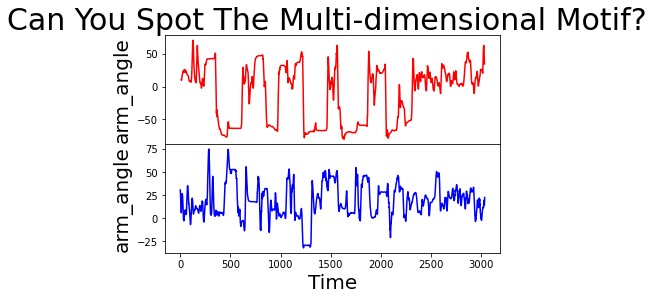

In [3]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')

axs[0].set_ylabel(f'arm_angle', fontsize='20')
axs[0].set_xlabel('Time', fontsize ='20')
axs[0].plot(sleep1['arm_angle'],  color='r')

axs[1].set_ylabel(f'arm_angle', fontsize='20')
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].plot(sleep2['arm_angle'],  color='b')

plt.show()

In [4]:
m = 500
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)

mps['arm_angle1'] = sp.stump(sleep1['arm_angle'], m)
motif_distance = np.round(mps['arm_angle1'][:, 0].min(), 1)
print(f"The motif pair matrix profile value in sleep1 is {motif_distance}")
motifs_idx['arm_angle1'] = np.argsort(mps['arm_angle1'][:, 0])[:2]

mps['arm_angle2'] = sp.stump(sleep2['arm_angle'], m)
motif_distance = np.round(mps['arm_angle2'][:, 0].min(), 1)
print(f"The motif pair matrix profile value in sleep is {motif_distance}")
motifs_idx['arm_angle2'] = np.argsort(mps['arm_angle2'][:, 0])[:2]

The motif pair matrix profile value in sleep1 is 7.1
The motif pair matrix profile value in sleep is 18.0


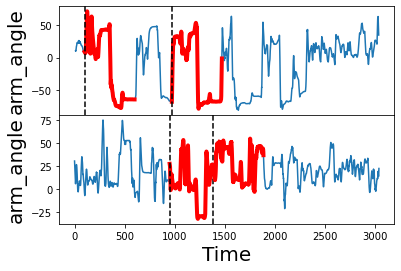

In [5]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})

axs[0].set_ylabel('arm_angle', fontsize='20')
axs[0].plot(sleep1['arm_angle'])
axs[0].set_xlabel('Time', fontsize ='20')
for idx in motifs_idx['arm_angle1']:
    axs[0].plot(sleep1['arm_angle'].iloc[idx:idx+m], c='red', linewidth=4)
    axs[0].axvline(x=idx, linestyle="dashed", c='black')

axs[1].set_ylabel('arm_angle', fontsize='20')
axs[1].plot(sleep2['arm_angle'])
axs[1].set_xlabel('Time', fontsize ='20')
for idx in motifs_idx['arm_angle2']:
    axs[1].plot(sleep2['arm_angle'].iloc[idx:idx+m], c='red', linewidth=4)
    axs[1].axvline(x=idx, linestyle="dashed", c='black')
    
plt.show()

In [8]:
m = 500
sleep1_mp = sp.stump(T_A = sleep1['arm_angle'],
                        m = m,
                        T_B = sleep2['arm_angle'],
                        ignore_trivial = False)

In [10]:
sleep1_motif_index = sleep1_mp[:, 0].argmin()
print(f'The motif is located at index {sleep1_motif_index} of Sleep1')

sleep2_motif_index = sleep1_mp[sleep1_motif_index, 1]
print(f'The motif is located at index {sleep2_motif_index} of Sleep2')

The motif is located at index 725 of Sleep1
The motif is located at index 1052 of Sleep2


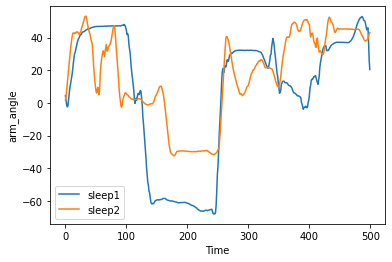

In [12]:
plt.plot(sleep1['arm_angle'].iloc[sleep1_motif_index : sleep1_motif_index + m].values, label='sleep1')
plt.plot(sleep2['arm_angle'].iloc[sleep2_motif_index : sleep2_motif_index+m].values, label='sleep2')

plt.xlabel('Time')
plt.ylabel('arm_angle')

plt.legend()

plt.show()